In [0]:
# To upload kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajay027","key":"11abdce9b31bb12168fdd7f39ec6cffe"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lrt kaggle.json

-rw-r--r-- 1 root root 63 May  6 15:08 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list -s 'Flowers Recognition'

ref                            title                 size  lastUpdated          downloadCount  
-----------------------------  -------------------  -----  -------------------  -------------  
alxmamaev/flowers-recognition  Flowers Recognition  225MB  2018-06-28 01:34:18          10580  
gverzea/edible-wild-plants     Edible wild plants   765MB  2018-10-14 16:00:35            428  


In [0]:
!kaggle datasets download alxmamaev/flowers-recognition

 97% 217M/225M [00:04<00:00, 49.6MB/s]
100% 225M/225M [00:04<00:00, 48.8MB/s]


In [0]:
!ls -lrt

total 230264
drwxr-xr-x 1 root root      4096 Apr 29 16:32 sample_data
-rw-r--r-- 1 root root        63 May  6 15:08 kaggle.json
-rw-r--r-- 1 root root 235781000 May  6 15:11 flowers-recognition.zip


In [0]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating

In [0]:
!ls -lrt

total 230268
drwxr-xr-x 7 root root      4096 Jan  6  2018 flowers
drwxr-xr-x 1 root root      4096 Apr 29 16:32 sample_data
-rw-r--r-- 1 root root        63 May  6 15:08 kaggle.json
-rw-r--r-- 1 root root 235781000 May  6 15:11 flowers-recognition.zip


In [0]:
import os
print(os.listdir('flowers'))

['tulip', 'sunflower', 'daisy', 'dandelion', 'rose']


### 1 ) Importing Various Modules.

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical



Using TensorFlow backend.


In [0]:
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn


# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

##2. Preparing the data

In [0]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:01<00:00, 498.57it/s]

769


In [0]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:01<00:00, 400.24it/s]

1503


In [0]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 433.16it/s]

2487


In [0]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

  0%|          | 0/1054 [00:00<?, ?it/s]


error: ignored

In [0]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 458.83it/s]

3658


### 2.2 Visualizing some random images.

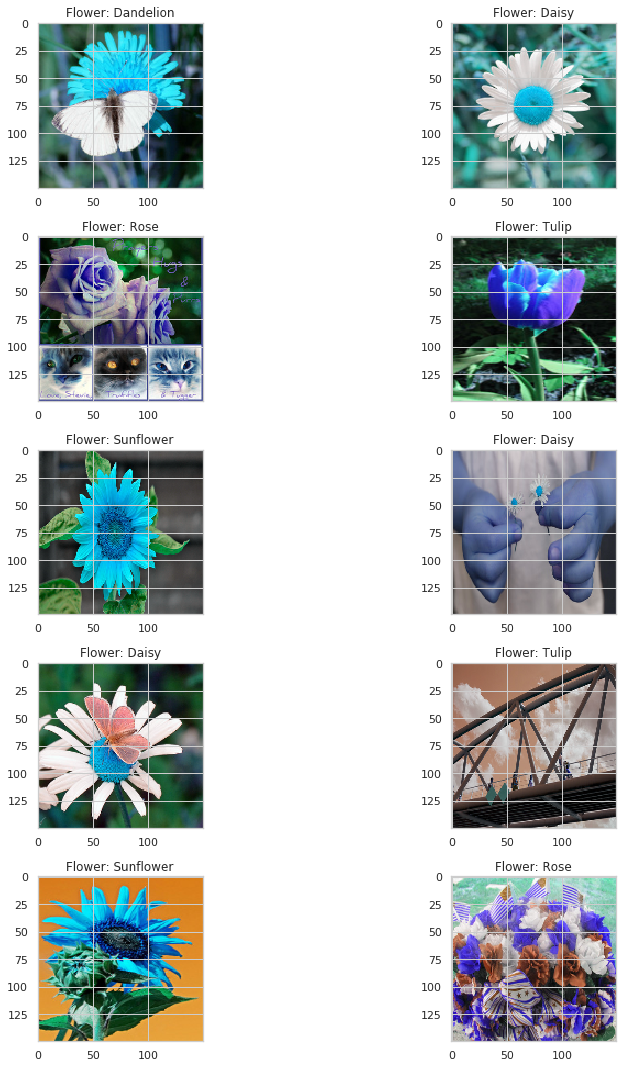

In [0]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15,15)

for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

###2.3 ) Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

### 2.4) Splitting into training and validation sets

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### 2.5 setting the random seeds

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

   --------

## 3. Building the CNN model

In [0]:
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= (5,5) , padding= 'Same', activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.


### 3.1 Using LR Anealer

In [0]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

### 3.2 Data Augmntation to prevent overfitting

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### 3.3 Compile the Model

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)        83040     
__________

### 3.4 Fitting on the train data and making the predictions

In [0]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
21/21 [==============================] - 14s 688ms/step - loss: 1.5693 - acc: 0.2649 - val_loss: 1.4211 - val_acc: 0.3945
Epoch 2/50
21/21 [==============================] - 11s 541ms/step - loss: 1.3143 - acc: 0.4410 - val_loss: 1.2253 - val_acc: 0.4492
Epoch 3/50
21/21 [==============================] - 11s 539ms/step - loss: 1.1385 - acc: 0.5201 - val_loss: 1.0919 - val_acc: 0.5628
Epoch 4/50
21/21 [==============================] - 12s 570ms/step - loss: 1.0446 - acc: 0.5699 - val_loss: 0.9872 - val_acc: 0.5934
Epoch 5/50
21/21 [==============================] - 12s 589ms/step - loss: 0.9670 - acc: 0.6161 - val_loss: 0.9305 - val_acc: 0.6306
Epoch 6/50
21/21 [==============================] - 11s 533ms/step - loss: 0.9560 - acc: 0.6278 - val_loss: 1.0008 - val_acc: 0.5967
Epoch 7/50
21/21 [==============================] - 11s 531ms/step - loss: 0.9356 - acc: 0.6337 - val_loss: 0.9490 - val_acc: 0.6481
Epoch 8/50
21/21 [===

In [0]:
## Visualizing Predictons on the Validation Set
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

ValueError: ignored

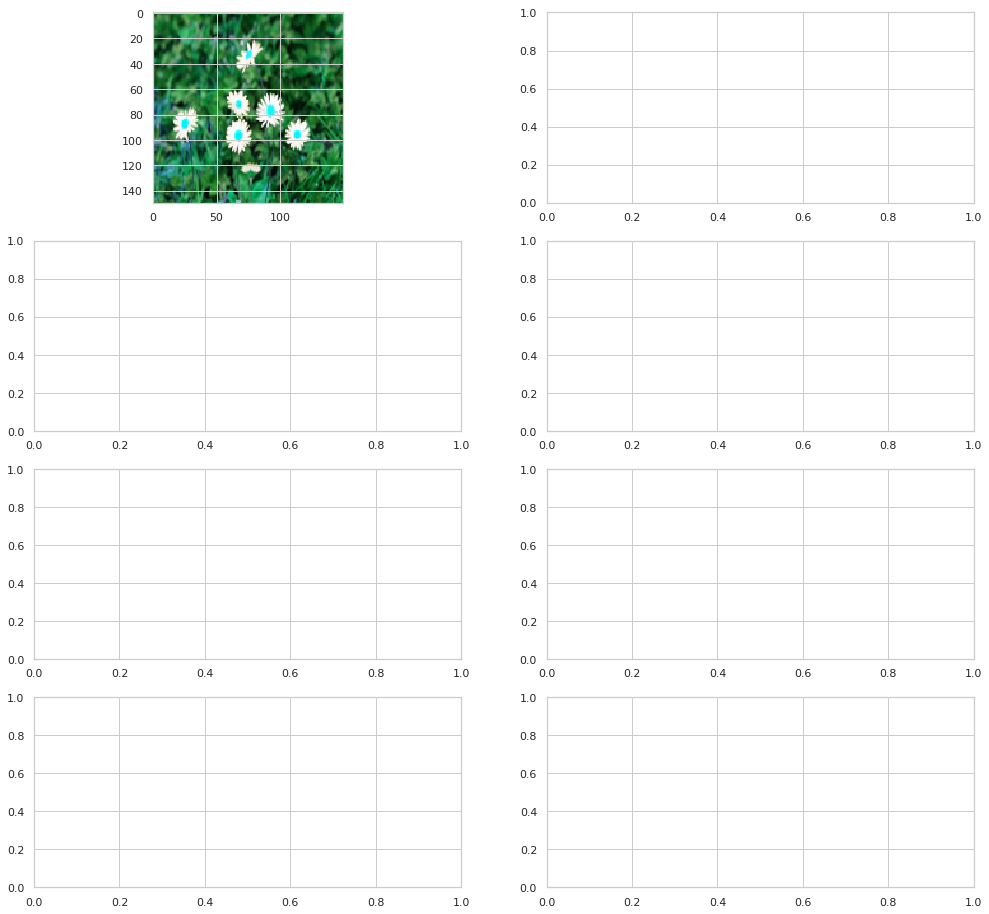

In [0]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

In [0]:
new_flower_1 = 'flowers/Flower_1.jpeg'
new_flower_2 = 'flowers/Flower_2.jpeg'

In [0]:
img_n = cv2.imread(new_flower_1, cv2.IMREAD_COLOR)
img_n = cv2.resize(img_n, (IMG_SIZE,IMG_SIZE))

In [0]:

new_flower_1 = new_flower_1/255
new_flower_2 = new_flower_2/255

TypeError: ignored

In [0]:
pred_new = model.predict(img_n)
pred_digits=np.argmax(pred_new, axis=1)

ValueError: ignored